<a href="https://colab.research.google.com/github/pradeepdhayanandan/colab_projects/blob/main/Yulu_Hypothesis_Testing_Business_Case_Pradeep_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yulu : Hypothesis Testing_Business_Case_Pradeep_D**

### **Problem Statement:**




Yulu, India’s leading micro-mobility provider, wants to identify key factors influencing the demand for their shared electric cycles. Due to recent revenue dips, they seek to analyze whether external factors such as weather, season, and working days affect the number of rentals. Our goal is to apply statistical methods to uncover patterns and provide data-driven recommendations.

**The primary business questions to answer are:**
1.	Which variables significantly impact the demand for shared electric cycles?
2.	How well do these variables explain the variation in demand?
3.	Are there statistically significant differences in demand across different seasons, weather conditions, and types of days (e.g., working vs. non-working days)?
4.	Are certain conditions (e.g., season and weather) interdependent, indicating predictable usage patterns?

**The findings from this study will help Yulu in:**

 •	Optimizing fleet allocation and operational planning.

 •	Improving demand forecasting.

 •	Enhancing marketing strategies and pricing models.

 •	Delivering a more consistent and reliable customer experience.

 • By developing data-driven insights, Yulu aims to restore and grow its ridership and revenue while ensuring efficient service delivery across Indian cities.



## **Installation of all packages and importing all the libraries**

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import levene
from scipy.stats import shapiro

## **Importing the files from the drive**

In [ ]:
!gdown 11TZfomDguaTSOR-9aTcaXbd8Gi0qEXKD

df = pd.read_csv('bike_sharing.csv')

Downloading...
From: https://drive.google.com/uc?id=11TZfomDguaTSOR-9aTcaXbd8Gi0qEXKD
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 29.6MB/s]


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## **Pre-Processing the Data**

### **Checking for Duplicates, Null values & performing basic analysis**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df[df.duplicated()] # checking for duplicates and no duplicate values are present

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
print(df.isnull().sum()) # No null values are present columns
print(df.isna().sum() | (df=='').sum()) # No missing/blank values are present in columns

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Determining the shape, datatype, missing values and statistical summary, info of the attributes in the dataset:

print(f"Shape of the data is {df.shape}\n")
print(f"Data types of the attributes:\n{df.dtypes}\n")
print(f"Total Missing values:\n{df.isnull().sum()}\n")
print(f"Statistical summary of the data:\n{df.describe()}\n")
print(f"Data info of the attributes:\n{df.info()}\n")

Shape of the data is (10886, 12)

Data types of the attributes:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Total Missing values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Statistical summary of the data:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%   

In [ ]:
# Parse datetime(converting it to the date time format)
df['datetime'] = pd.to_datetime(df['datetime'])

# Extracting useful time based features
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month

# Converting it to categorical
df[['season', 'holiday', 'workingday', 'weather']] = df[['season', 'holiday', 'workingday', 'weather']].astype('category')


df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  weekday     10886 non-null  int32         
 14  month       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float64(3), int32(3), int64(4)
memo

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


## **Finding the counts of each categorical variable both using graphical and non-graphical analysis.**

**Column Profiling:**
* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
   * 1: Clear, Few clouds, partly cloudy, partly cloudy
   * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

### **Non-Graphical Analysis/Value Counts for Categorical variables**

In [ ]:
val = df
for column in val.columns:
  if val[column].dtype == 'category':
    print(f"\ncolumn:{column}")
    print(f"Value_counts:{df[column].value_counts()}")


column:season
Value_counts:season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

column:holiday
Value_counts:holiday
0    10575
1      311
Name: count, dtype: int64

column:workingday
Value_counts:workingday
1    7412
0    3474
Name: count, dtype: int64

column:weather
Value_counts:weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


### **Non-Graphical Analysis / unique attributes for Categorical variables**

In [ ]:
# Finding the unique values for the categorical variables

val = df
for column in val.columns:
  if val[column].dtypes == 'category':
      print(f"\ncolumn:{column}")
      print(f"Value_counts:{df[column].nunique()}")


column:season
Value_counts:4

column:holiday
Value_counts:2

column:workingday
Value_counts:2

column:weather
Value_counts:4


###### **INSIGHTS**:

* **Season Distribution :** The dataset has good seasonal balance, with winter having slightly more observations. 4 unique seasons with relatively balanced distribution.
  * Winter (4): 2734 records
  * Summer (2): 2733 records
  * Fall (3): 2733 records
  * Spring (1): 2686 records

* **Holiday Distribution :** Holidays represent ~2.85% of the data. 2 unique values with highly imbalanced distribution.

  * Non-holiday (0): 10575 records (~97.1%)
  * Holiday (1): 311 records (~2.85%)

* **Working Day Distribution :** 2 unique values with slight imbalance.

  * Working day (1): 7412 records (~68.08%)
  * Non-working day (0): 3474 records (~31.91%)

* **Weather Distribution:** 4 unique weather conditions with highly skewed distribution, Clear, Few clouds, partly cloudy, weather(category 1) dominates (66.06%), while Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather (category 4) is extremely rare(0.0091%) .

  * Clear, Few clouds, partly cloudy, partly cloudy (1): 7192 records (~66.06%)
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (2): 2834 records (~26.03%)
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (3): 859 records (~7.89%)
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (4): 1 record (~0.0091%)

## **Graphical analysis of the categorical attributes**


## **Univariate Analysis**

### **Continuous Variables**

In [ ]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  weekday     10886 non-null  int32         
 14  month       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float64(3), int32(3), int64(4)
memo

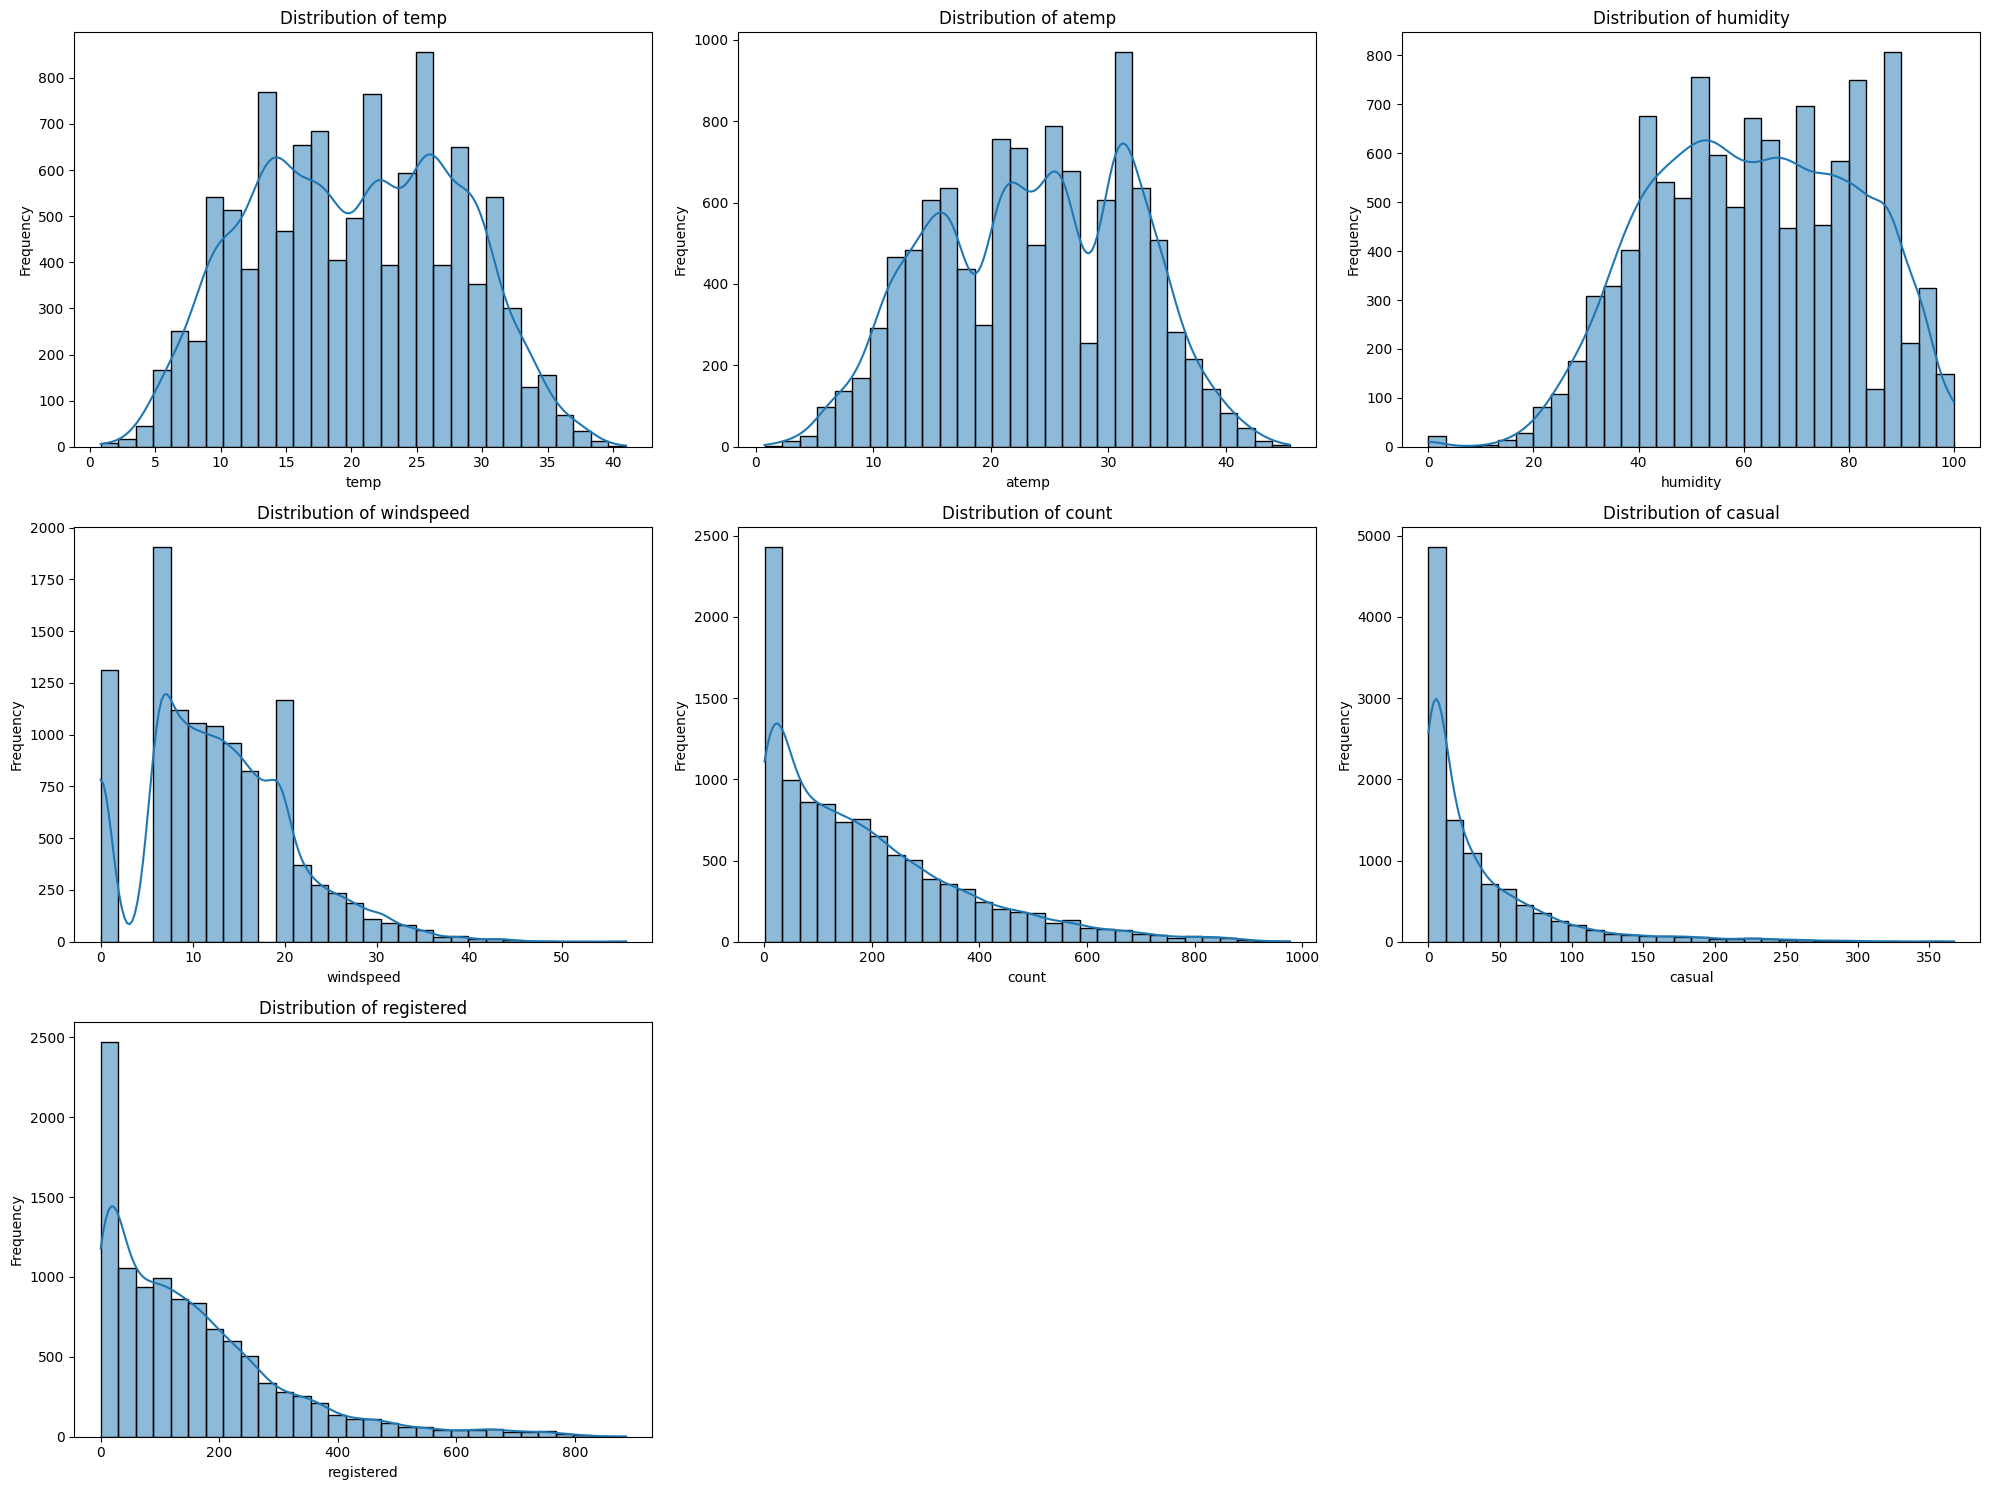

In [ ]:
# Plotting the histplot for all the continuous variables

cont_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count', 'casual', 'registered']

plt.figure(figsize=(20, 15))

for i, col in enumerate(cont_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('continuous_variables_distribution.jpeg')  # Saving the full image
plt.show()


###### **INSIGHTS**:
i) **temp & atemp:**
* Bell shaped distribution most of the rides happen in 20 - 30°C range.

ii) **humidity:**

* Right skewed with most values are between 50-80.

iii) **windspeed:**

* Right skewed with a sharp peak near 0-10, indicating low wind speeds dominate.

iv) **count (total rides):**

* Right skewed peaking around 100-200, with a long tail showing most counts are low to moderate.

v) **casual users:**

* Right skewed with a peak below 100, indicating fewer casual users and a long tail.

vi) **registered users:**

* Right skewed peaking around 100-200, with a longer tail indicating more consistent usage.



### **Categorical Variables**

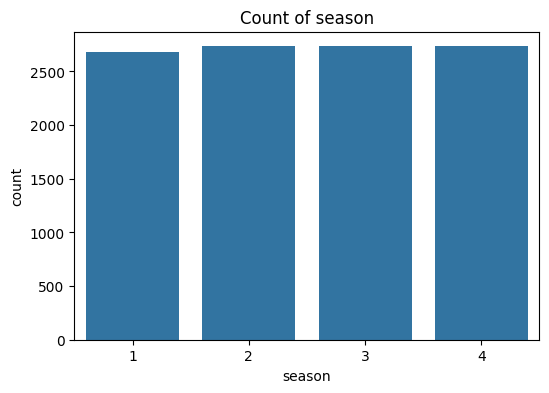

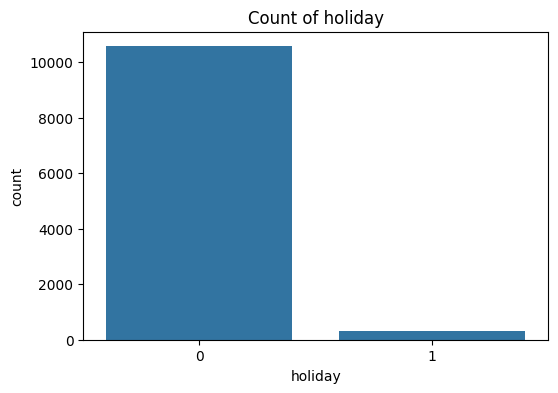

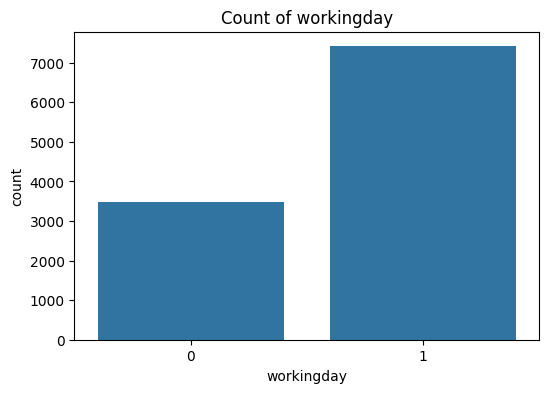

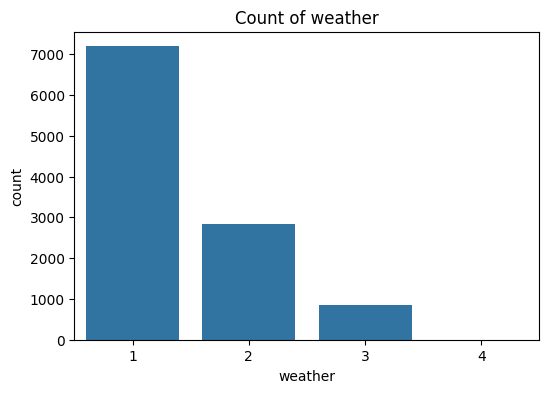

In [ ]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()

###### **INSIGHTS**:

* **Season Distribution :** The dataset has good seasonal balance, with winter having slightly more observations. 4 unique seasons with relatively balanced distribution.
  * Winter (4): 2734 records
  * Summer (2): 2733 records
  * Fall (3): 2733 records
  * Spring (1): 2686 records

* **Holiday Distribution :** Holidays represent ~2.85% of the data. 2 unique values with highly imbalanced distribution.

  * Non-holiday (0): 10575 records (~97.1%)
  * Holiday (1): 311 records (~2.85%)

* **Working Day Distribution :** 2 unique values with slight imbalance.

  * Working day (1): 7412 records (~68.08%)
  * Non-working day (0): 3474 records (~31.91%)

* **Weather Distribution:** 4 unique weather conditions with highly skewed distribution, Clear, Few clouds, partly cloudy, weather(category 1) dominates (66.06%), while Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather (category 4) is extremely rare(0.0091%) .

  * Clear, Few clouds, partly cloudy, partly cloudy (1): 7192 records (~66.06%)
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (2): 2834 records (~26.03%)
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (3): 859 records (~7.89%)
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (4): 1 record (~0.0091%)

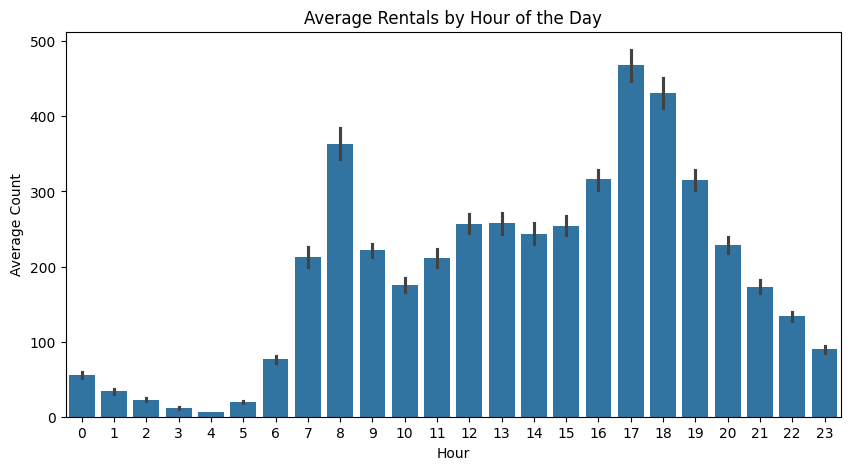

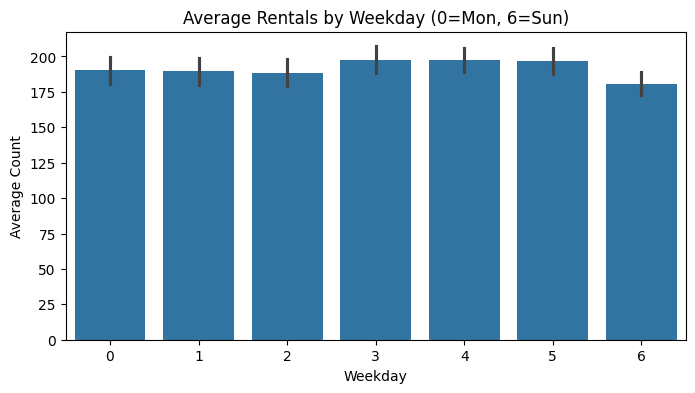

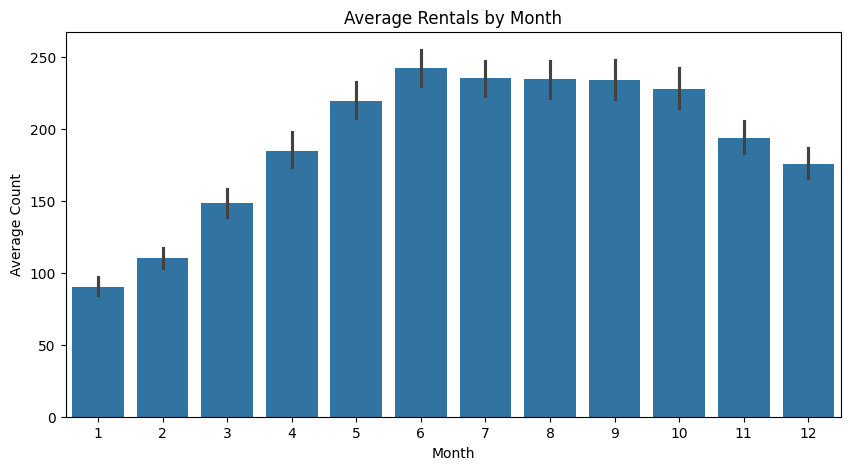

In [ ]:
# Rentals by Hour of the day

plt.figure(figsize=(10,5))
sns.barplot(x='hour', y='count', data=df, estimator='mean')
plt.title('Average Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.show()


# Rentals by Weekday

plt.figure(figsize=(8,4))
sns.barplot(x='weekday', y='count', data=df, estimator='mean')
plt.title('Average Rentals by Weekday (0=Mon, 6=Sun)')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.show()

# Rentals by Month
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='count', data=df, estimator='mean')
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()




###### **INSIGHTS**:

**Hour of Day:**
* Rentals peak around 7-8 AM and 5-6 PM (commute hours), with lows at night (3-4 AM).

**Weekday:**
* Rentals are consistently around 175 across all days, with slight variations peaking midweek.

**Month:**
* Rentals rise sharply from March (around 150) to a peak in June (around 250), then decline from November (below 200).


## **Bivariate Analysis**

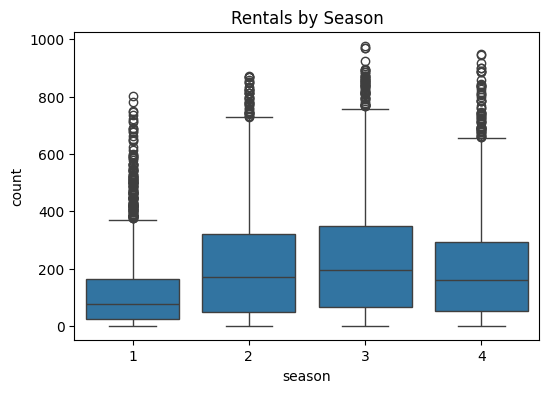

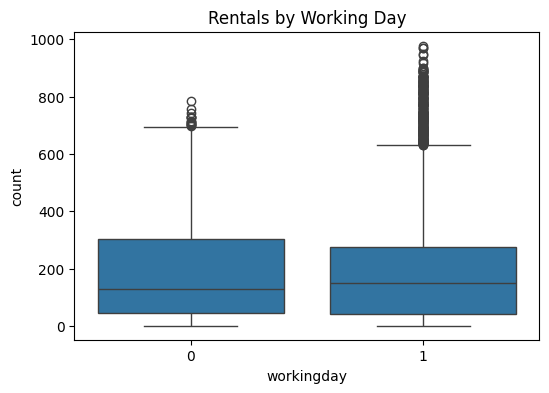

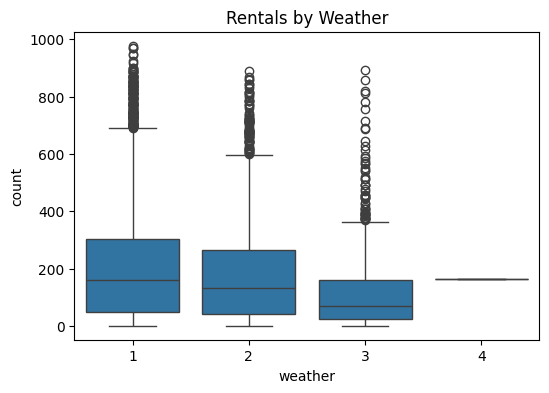

In [ ]:
#Count vs Season

plt.figure(figsize=(6,4))
sns.boxplot(x='season', y='count', data=df)
plt.title('Rentals by Season')
plt.show()

#Count vs Working Day

plt.figure(figsize=(6,4))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Rentals by Working Day')
plt.show()

#Count vs Weather

plt.figure(figsize=(6,4))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Rentals by Weather')
plt.show()


###### **INSIGHTS**:

**Rentals by Season:**
* Rental demand remains fairly consistent across all seasons, with a slight increase during Summer (2) and Fall (3). In contrast, Spring (1) and Winter (4) see slightly lower rentals. This suggests that warmer temperatures and pleasant weather encourage higher usage.

**Rentals by Working Day:**
* Higher rentals are observed on working days (1) compared to non-working days (0), indicating that commuting behavior plays a major role in demand.

**Rentals by Weather Condition:**
* Rentals are highest in favorable weather conditions: Weather 1 (Clear, Few Clouds) and Weather 2 (Mist + Cloudy). Demand drops significantly during Weather 3 (Light Rain/Snow) and is almost negligible in Weather 4 (Severe conditions). This confirms that poor weather strongly deters usage.

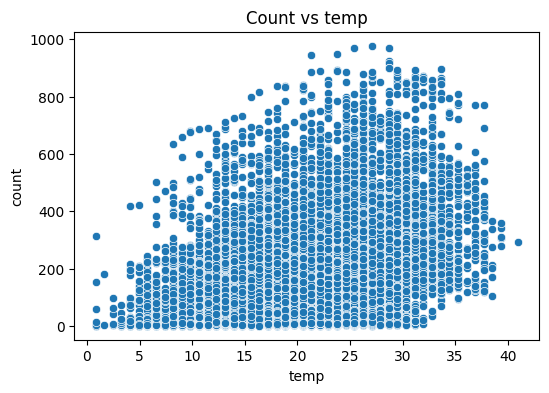

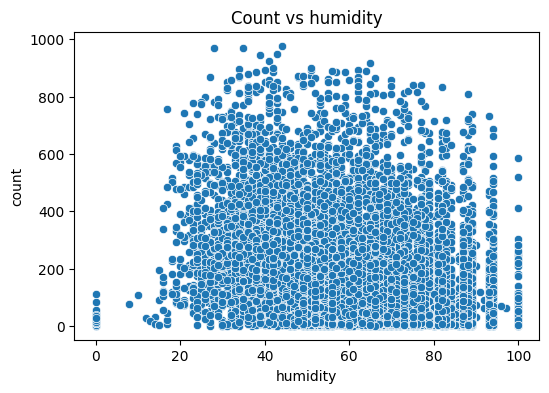

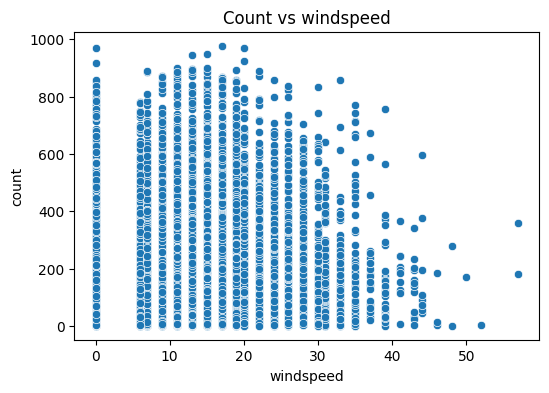

In [ ]:
# Scatterplots for continuous variables

cont_cols = ['temp', 'humidity', 'windspeed']

for col in cont_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='count', data=df)
    plt.title(f'Count vs {col}')
    plt.show()


###### **INSIGHTS**:

**Count vs Temp:** Rentals increase with temperature, peaking between 20-30°C (around 800-1000), suggesting optimal usage in moderate to warm weather.

**Count vs Humidity:** Rentals are highest at 40-60% humidity (around 800-1000), with a sharp drop at extreme highs (>80%), indicating preference for moderate humidity levels.

**Count vs Windspeed:** Rentals are concentrated at low windspeeds (0-10, up to 1000), declining sharply beyond 20, showing that higher winds deter usage.

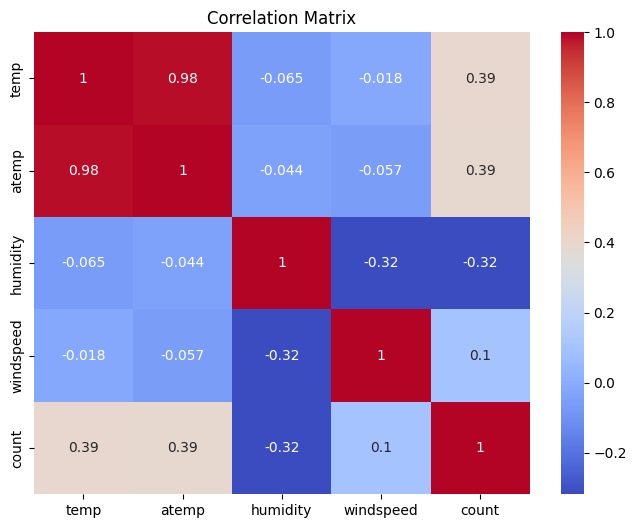

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


###### **INSIGHTS**:

**Temp & Atemp vs Count:**
* Moderate positive correlation (+0.39) with rentals warmer weather boosts demand.

**Temp vs Atemp:**
* Very high correlation (+0.98) have to pick only one to avoid multicollinearity.

**Humidity vs Count:**
* Moderate negative correlation (-0.32) which means high humidity reduces usage.

**Windspeed vs Count:**
* Very weak correlation (+0.10) minimal impact on the rentals.

**Humidity vs Windspeed:**
* Negative correlation (-0.32) windier days tend to be less humid.



## **Hypothesis Testing**

###**Two-Sample T-Test**

To check whether working Day has effect on the number of electric cycles rented:

**Null Hypothesis (H₀)**: Working day has no significant effect on number of electric cycles rented.

**Alternative Hypothesis (H₁)**: Working day has a significant effect on number of electric cycles rented (could be higher or lower).

**Test Selection :** 2- Sample T-Test to check if working day has an significant effect on the number of electric cycles rented.

**Tail Selection :** Since we just want to check any difference we are performing two-tailed test.



In [ ]:
working = df[df['workingday'] == 1]['count']  # Splitting the data
not_working = df[df['workingday'] == 0]['count']

#using levene's test to check whether the variance is equal or not

stat, p = levene(working, not_working)

alpha = 0.05 #assuming the 5% significance level
if p < alpha:
  equal_variance = False #Variances are significantly different

else:
  equal_variance = True #Variances are not significantly different


t_stat, p_value = ttest_ind(working, not_working, equal_var=equal_variance, alternative = 'two-sided')


if p_value < alpha:
    print(f"P-value is {p_value} ----> Reject Null Hypothesis: Working day has a significant effect on rentals.")
else:
    print(f"P-value is {p_value} ----> Fail to Reject Null Hypothesis: No significant difference on rentals due to working day.")



P-value is 0.22644804226361348 ----> Fail to Reject Null Hypothesis: No significant difference on rentals due to working day.


###**Annova Test**

To check if No. of cycles rented is similar or different in
* Weather
* Season



**Weather:**

**Null Hypothesis (H₀)**: Weather has no significant effect on number of electric cycles rented.

**Alternative Hypothesis (H₁)**: Weather has significant effect on number of electric cycles rented.

**Test Selection :** ANOVA test to check if Weather has an significant effect on the number of electric cycles rented.

**Assumptions :** Checking the assumptions of ANOVA test
* Normal distribution using (QQ plot, Shapiro Wilk's test)
* Equal variances using (Levene's Test)

<Figure size 400x400 with 0 Axes>

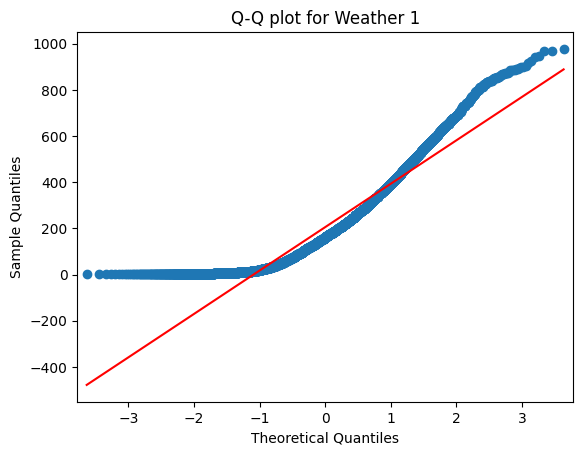

<Figure size 400x400 with 0 Axes>

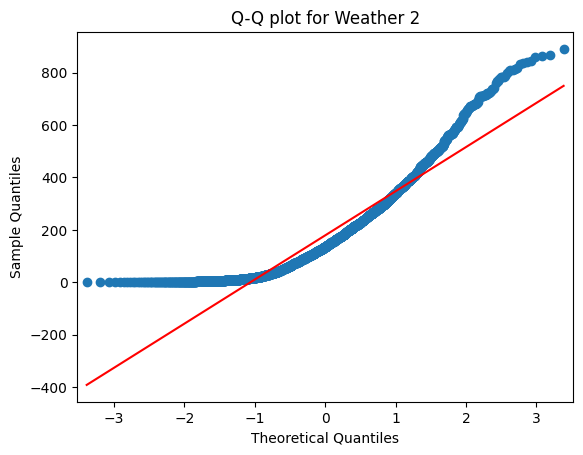

<Figure size 400x400 with 0 Axes>

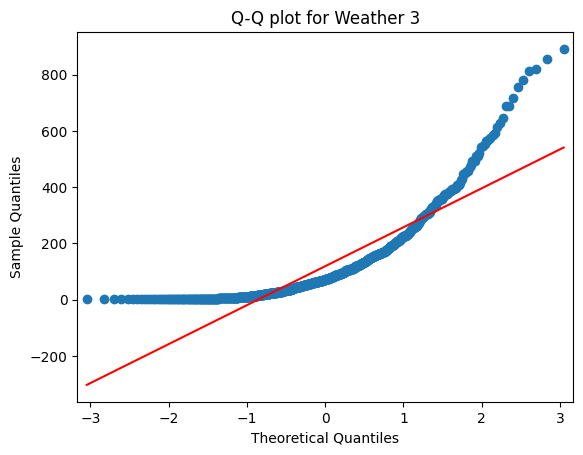

<Figure size 400x400 with 0 Axes>

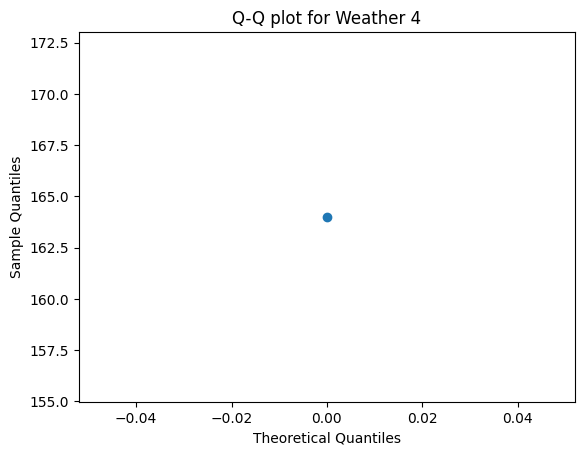



Shapiro-Wilk Test for Weather 1 => p-value: 0.0000
Shapiro-Wilk Test for Weather 1 is not normally distributed

Shapiro-Wilk Test for Weather 2 => p-value: 0.0000
Shapiro-Wilk Test for Weather 2 is not normally distributed

Shapiro-Wilk Test for Weather 3 => p-value: 0.0000
Shapiro-Wilk Test for Weather 3 is not normally distributed

Shapiro-Wilk Test for Weather 4 => p-value: nan
Shapiro-Wilk Test for Weather 4 is not normally distributed

Levene’s Test p-value: 0.0000
Levene’s Test for Weather is not having equal variances




/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipython-input-216-3858444151.py:16: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(group)


In [ ]:
# Splitting the data based on groups

weather_groups = [group['count'].values for _, group in df.groupby('weather', observed=True)]

#Checking for Normality using QQ Plot (Visually checking)
for i, group in enumerate(weather_groups):
    plt.figure(figsize=(4, 4))
    qqplot(group, line="s")
    plt.title(f'Q-Q plot for Weather {i+1}')
    plt.show()
print("\n")

#Checking for Normality using Shapiro-Wilk Test (statistical test)

for i, group in enumerate(weather_groups):
    stat, p = shapiro(group)
    print(f"Shapiro-Wilk Test for Weather {i+1} => p-value: {p:.4f}")
    if p > 0.05:
      print(f"Shapiro-Wilk Test for Weather {i+1} is normally distributed\n")
    else:
      print(f"Shapiro-Wilk Test for Weather {i+1} is not normally distributed\n")


# Checking for Equal Variances using Levene's Test:

stat, p = levene(*weather_groups)  #using * to unpack the list
print(f"Levene’s Test p-value: {p:.4f}")
if p > 0.05:
  print(f"Levene’s Test for Weather is having equal variances")
else:
  print(f"Levene’s Test for Weather is not having equal variances")
print("\n")




###### **INSIGHTS**:

* All the weather groups fail the normality assumption (because p-value < 0.05).

* Weather 4 has too few observations (only 1), so normality test is not applicable.

* Levene's Test for Weather has failed the equal variance assumption

* **As per the exception even if some assumptions fail (levene's test or Shapiro-wilk test) after cross verfying with visual analysis we can proceed with ANOVA test.**

In [ ]:
# Performing the ANOVA test for weather

f_stat, p_value = f_oneway(*weather_groups)
print(f"ANOVA result for Weather: F-stat = {f_stat:.4f}, p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Weather has significant effect on number of electric cycles rented.")
else:
    print("Fail to Reject H0: Weather has no significant effect on number of electric cycles rented.")

ANOVA result for Weather: F-stat = 65.5302, p-value = 0.0000
Reject H0: Weather has significant effect on number of electric cycles rented.




**Season:**

**Null Hypothesis (H₀)**: Season has no significant effect on number of electric cycles rented.

**Alternative Hypothesis (H₁)**: Season has significant effect on number of electric cycles rented.

**Test Selection :** ANOVA test to check if Season has an significant effect on the number of electric cycles rented.

**Assumptions :** Checking the assumptions of ANOVA test
* Normal distribution using (QQ plot, Shapiro Wilk's test)
* Equal variances using (Levene's Test)

<Figure size 400x400 with 0 Axes>

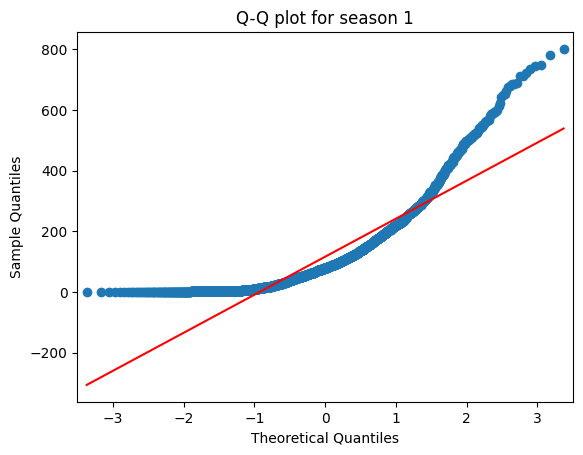

<Figure size 400x400 with 0 Axes>

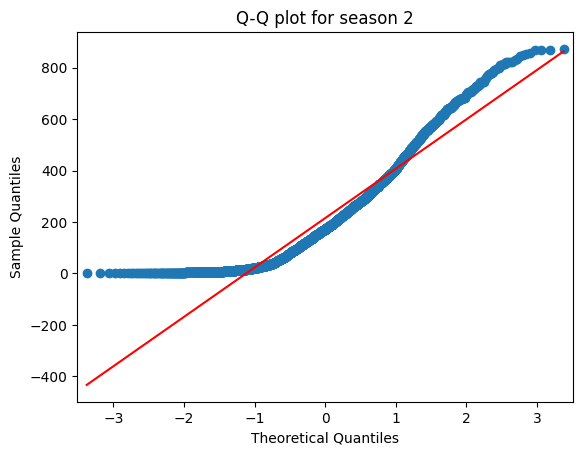

<Figure size 400x400 with 0 Axes>

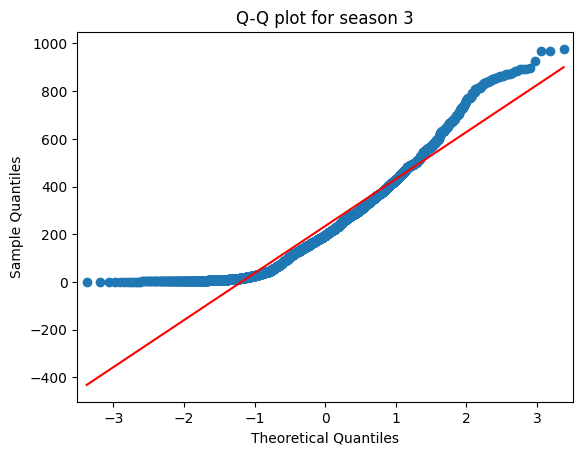

<Figure size 400x400 with 0 Axes>

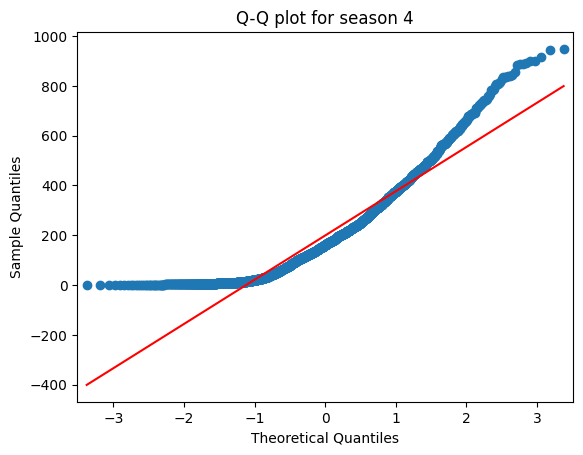



Shapiro-Wilk Test for season 1 => p-value: 0.0000
Shapiro-Wilk Test for season 1 is not normally distributed

Shapiro-Wilk Test for season 2 => p-value: 0.0000
Shapiro-Wilk Test for season 2 is not normally distributed

Shapiro-Wilk Test for season 3 => p-value: 0.0000
Shapiro-Wilk Test for season 3 is not normally distributed

Shapiro-Wilk Test for season 4 => p-value: 0.0000
Shapiro-Wilk Test for season 4 is not normally distributed

Levene’s Test p-value: 0.0000
Levene’s Test for season is not having equal variances




In [ ]:
# Splitting the data based on groups

season_groups = [group['count'].values for _, group in df.groupby('season', observed=True)]

#Checking for Normality using QQ Plot (Visually checking)
for i, group in enumerate(season_groups):
    plt.figure(figsize=(4, 4))
    qqplot(group, line="s")
    plt.title(f'Q-Q plot for season {i+1}')
    plt.show()
print("\n")

#Checking for Normality using Shapiro-Wilk Test (statistical test)

for i, group in enumerate(season_groups):
    stat, p = shapiro(group)
    print(f"Shapiro-Wilk Test for season {i+1} => p-value: {p:.4f}")
    if p > 0.05:
      print(f"Shapiro-Wilk Test for season {i+1} is normally distributed\n")
    else:
      print(f"Shapiro-Wilk Test for season {i+1} is not normally distributed\n")


# Checking for Equal Variances using Levene's Test:

stat, p = levene(*season_groups)  #using * to unpack the list
print(f"Levene’s Test p-value: {p:.4f}")
if p > 0.05:
  print(f"Levene’s Test for season is having equal variances")
else:
  print(f"Levene’s Test for season is not having equal variances")
print("\n")




###### **INSIGHTS**:

* All the season groups fail the normality assumption (because p-value < 0.05).

* Levene's Test for season has failed the equal variance assumption.

* **As per the exception even if some assumptions fail (levene's test or Shapiro-wilk test) after cross verfying with visual analysis we can proceed with ANOVA test.**

In [ ]:
# Performing the ANOVA test for season

f_stat, p_value = f_oneway(*season_groups)
print(f"ANOVA result for Season: F-stat = {f_stat:.4f}, p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Season has significant effect on number of electric cycles rented.")
else:
    print("Fail to Reject H0: Season has no significant effect on number of electric cycles rented.")

ANOVA result for Season: F-stat = 236.9467, p-value = 0.0000
Reject H0: Season has significant effect on number of electric cycles rented.


##**Chi-square Test**

To check if weather is dependent on the season.

**Null Hypothesis (H₀)**: weather and season are not related (Independent).

**Alternative Hypothesis (H₁)**: weather and season are related (Dependent).

**Test Selection :** Chi-Square Test of Independence to check relationship between two categorical variables(weather & season).


In [ ]:
# Performing Chi-square Test

contingency_table = pd.crosstab(df['weather'], df['season']) # Creating the contingency table


print("Contingency Table:\n", contingency_table)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)


print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject null hypothesis: weather and season are related (Dependent).")
else:
    print("Fail to reject null hypothesis: weather and season are not related (Independent).")

Contingency Table:
 season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

Chi-Square Statistic: 49.1587
Degrees of Freedom: 9
P-value: 0.0000
Reject null hypothesis: weather and season are related (Dependent).


# **Final Summary & Business Recommendations**

## **Key Business Insights**

* Cycle rentals are significantly higher on working days, indicating strong commuting behavior, particularly among registered users.

* Season and weather significantly influence demand. Rentals peak in summer (2) and fall (3), and decline during spring (1) and winter (4), highlighting a sensitivity to temperature and seasonal comfort.

* Adverse weather leads to a sharp drop in rentals, especially in:
    
    Weather Type 3: Light snow, light rain, thunderstorms with scattered clouds

    Weather Type 4: Heavy rain, ice pellets, thunderstorm, snow, and fog

 This emphasizes that unfavorable weather conditions are a major barrier to usage, particularly for casual users.

* Chi-square test reveals a dependency between season and weather, suggesting these environmental variables are interlinked and together shape rental behavior.

## **Recommendations**

* Focus marketing and fleet availability during summer and fall, as these seasons see the highest rental demand.

* Increase availability on working days, especially near offices and metro stations, to serve the weekday commuter segment effectively.

* Enhance operations during clear and misty weather, as rentals are significantly higher in these conditions.

* Introduce targeted incentives or discounts during low-demand seasons like spring and winter to stimulate usage and balance demand.

* Engage casual users more actively during weekends and favorable weather through promotions or in app engagement.

* Utilize low demand days (e.g, heavy rain/snow) for maintenance or operational planning, minimizing impact on peak periods.